# 5 Modeling

### 5.1.Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve


### 5.2. Load data

In [2]:
expected_model_version = '1.0'
model_path_CO = 'Desktop/Springboard/Capstone2/CO_model.pkl'
if os.path.exists(model_path_CO):
    with open(model_path_CO, 'rb') as f:
        model_CO = pickle.load(f)  
else:
    print("Expected model not found")
    
model_path_NOX = 'Desktop/Springboard/Capstone2/NOX_model.pkl'
if os.path.exists(model_path_NOX):
    with open(model_path_NOX, 'rb') as f:
        model_NOX = pickle.load(f)  
else:
    print("Expected model not found")    
    
model_path_NO2 = 'Desktop/Springboard/Capstone2/NO2_model.pkl'
if os.path.exists(model_path_NO2):
    with open(model_path_NO2, 'rb') as f:
        model_NO2 = pickle.load(f)  
else:
    print("Expected model not found")    
    
model_path_NMH = 'Desktop/Springboard/Capstone2/NMH_model.pkl'
if os.path.exists(model_path_NMH):
    with open(model_path_NMH, 'rb') as f:
        model_NMH = pickle.load(f)  
else:
    print("Expected model not found")    
    
    

In [3]:
df = pd.read_csv('Desktop/Springboard/Capstone2/Wrangledata.csv')


### 5.3.1 Investigating temperature and humidity effect on CO sensor & real data

In [4]:
df['Temperature'].describe()

count    8991.000000
mean       18.317829
std         8.832116
min        -1.900000
25%        11.800000
50%        17.800000
75%        24.400000
max        44.600000
Name: Temperature, dtype: float64

In [5]:
df['Absolute Humidity'].describe()

count    8991.000000
mean        1.025530
std         0.403813
min         0.184700
25%         0.736800
50%         0.995400
75%         1.313700
max         2.231000
Name: Absolute Humidity, dtype: float64

In [6]:
df['CO_Sensor'].describe()

count    8991.000000
mean     1099.833166
std       217.080037
min       647.000000
25%       937.000000
50%      1063.000000
75%      1231.000000
max      2040.000000
Name: CO_Sensor, dtype: float64

In [7]:
CO=df[['CO_Real', 'Temperature','Absolute Humidity','CO_Sensor']]
CO.dropna(inplace=True)
X_CO=CO[['CO_Sensor', 'Temperature','Absolute Humidity']]
y_CO=CO['CO_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
CO_predict=model_CO.predict(X_CO)

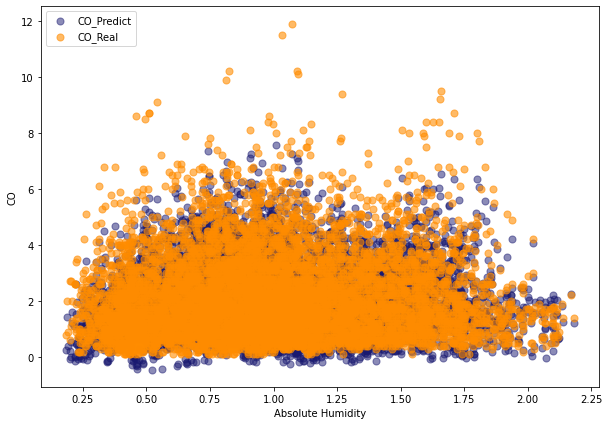

In [9]:
# Humidity Effect on CO Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(CO['Absolute Humidity'],CO_predict, color='midnightblue', alpha=0.5, label='CO_Predict', s=50)
_=plt.scatter(CO['Absolute Humidity'],CO['CO_Real'], color='darkorange', alpha=0.6, label='CO_Real', s=50)
plt.xlabel('Absolute Humidity')
plt.ylabel('CO')
plt.legend(loc="upper left")

plt.show()

* It looks like that model can't predict very low levels of CO and showed negative number in the low levels. 
* The model can't predict very high levels of CO.
* It's hard to conclude where the model deviations happen but more deviations observed in high levels of humidity.

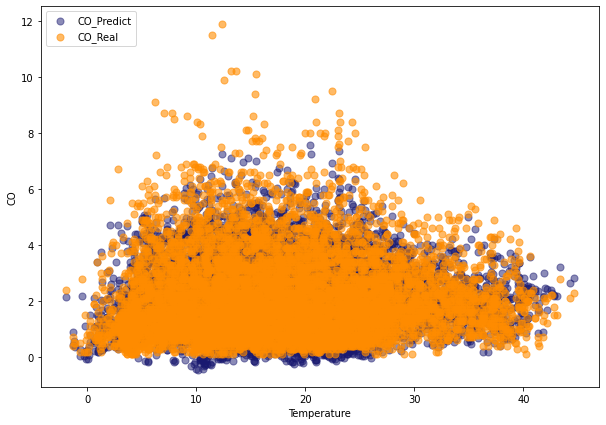

In [10]:
# Temperature Effect on CO Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(CO['Temperature'],CO_predict, color='midnightblue', alpha=0.5, label='CO_Predict', s=50)
_=plt.scatter(CO['Temperature'],CO['CO_Real'], color='darkorange', alpha=0.6, label='CO_Real', s=50)
plt.xlabel('Temperature')
plt.ylabel('CO')
plt.legend(loc="upper left")

plt.show()

* Main difference observed in temperatures between 10-20.In these temperatures, high levels of CO_real observed but model could'nt predict these high levels. 

### 5.3.2 Investigating temperature and humidity effect on NOX sensor & real data

In [11]:
NOX=df[['NOX_Real', 'Temperature','Absolute Humidity','NOX_Sensor']]
NOX.dropna(inplace=True)
X_NOX=NOX[['NOX_Sensor', 'Temperature','Absolute Humidity']]
y_NOX=NOX['NOX_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
NOX_predict=model_NOX.predict(X_NOX)

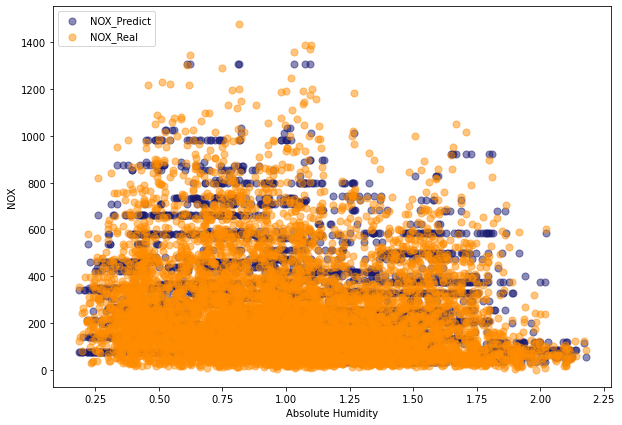

In [13]:
# Humidity Effect on NOX Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(NOX['Absolute Humidity'],NOX_predict, color='midnightblue', alpha=0.5, label='NOX_Predict', s=50)
_=plt.scatter(NOX['Absolute Humidity'],NOX['NOX_Real'], color='darkorange', alpha=0.5, label='NOX_Real', s=50)
plt.xlabel('Absolute Humidity')
plt.ylabel('NOX')
plt.legend(loc="upper left")

plt.show()

In low humidity (below 0.75), more difference NOX real and sensor data is observed.

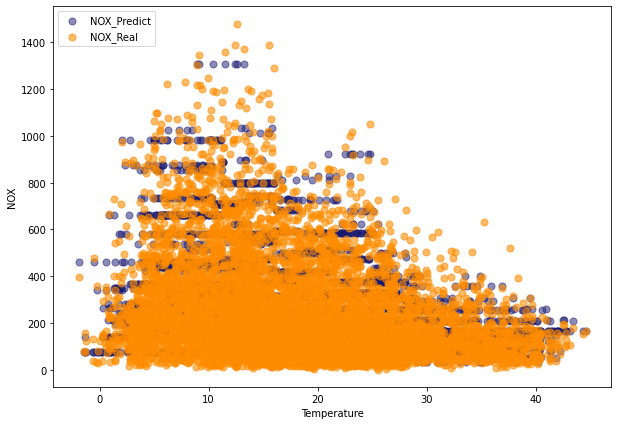

In [14]:
# Temperature Effect on NOX Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(NOX['Temperature'],NOX_predict, color='midnightblue', alpha=0.5, label='NOX_Predict', s=50)
_=plt.scatter(NOX['Temperature'],NOX['NOX_Real'], color='darkorange', alpha=0.6, label='NOX_Real', s=50)
plt.xlabel('Temperature')
plt.ylabel('NOX')
plt.legend(loc="upper left")

plt.show()

In low temperatures(below 10 C), more difference between Nox real and sensor data is observed.

### 5.3.3 Investigating temperature and humidity effect on NO2 sensor & real data

In [15]:
NO2=df[['NO2_Real', 'Temperature','Absolute Humidity','NO2_Sensor']]
NO2.dropna(inplace=True)
X_NO2=NO2[['NO2_Sensor', 'Temperature','Absolute Humidity']]
y_NO2=NO2['NO2_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
NO2_predict=model_NO2.predict(X_NO2)

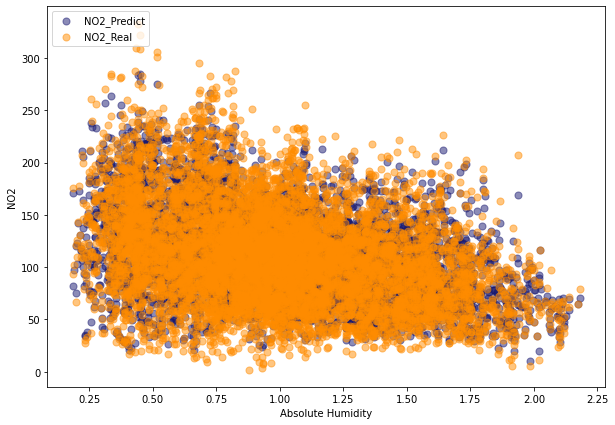

In [17]:
# Humidity Effect on NO2 Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(NO2['Absolute Humidity'],NO2_predict, color='midnightblue', alpha=0.5, label='NO2_Predict', s=50)
_=plt.scatter(NO2['Absolute Humidity'],NO2['NO2_Real'], color='darkorange', alpha=0.5, label='NO2_Real', s=50)
plt.xlabel('Absolute Humidity')
plt.ylabel('NO2')
plt.legend(loc="upper left")

plt.show()

Obviously, more difference between real and sensor data for NO2 observed in very low(0.25-0.35) and very high (1.75-2.25)levels of humidity.

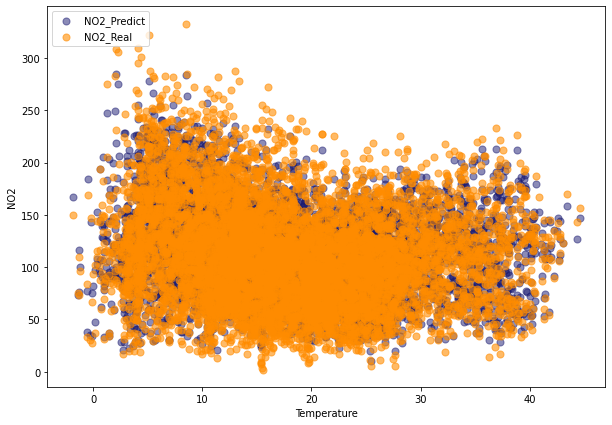

In [18]:
# Temperature Effect on NO2 Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(NO2['Temperature'],NO2_predict, color='midnightblue', alpha=0.5, label='NO2_Predict', s=50)
_=plt.scatter(NO2['Temperature'],NO2['NO2_Real'], color='darkorange', alpha=0.6, label='NO2_Real', s=50)
plt.xlabel('Temperature')
plt.ylabel('NO2')
plt.legend(loc="upper left")

plt.show()

More difference between real and sensor data for NO2 observed in very low(0-4 C) and very high (35-45 C) temperatures.

### 5.3.4 Investigating temperature and humidity effect on NMH sensor & real data

In [19]:
NMH=df[['Non Metanic Hydrocarbons_Real', 'Temperature','Absolute Humidity','Non Metanic Hydrocarbons_Sensor']]
NMH.dropna(inplace=True)
X_NMH=(NMH[['Non Metanic Hydrocarbons_Sensor', 'Temperature','Absolute Humidity']])
y_NMH=NMH['Non Metanic Hydrocarbons_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
NMH_predict=model_NMH.predict(X_NMH)

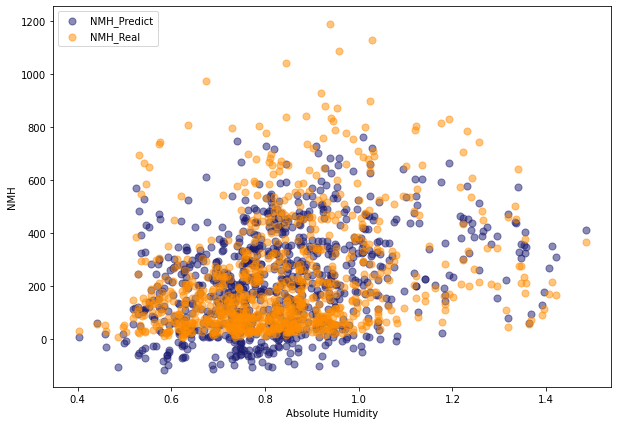

In [21]:
# Humidity Effect on NMH Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(NMH['Absolute Humidity'],NMH_predict, color='midnightblue', alpha=0.5, label='NMH_Predict', s=50)
_=plt.scatter(NMH['Absolute Humidity'],NMH['Non Metanic Hydrocarbons_Real'], color='darkorange', alpha=0.5, label='NMH_Real', s=50)
plt.xlabel('Absolute Humidity')
plt.ylabel('NMH')
plt.legend(loc="upper left")

plt.show()

* The linear model is not successful in predicting low levels of NMH and shows negative amounts.
* The model can't predict in very high levels of non methanic hydrocarbons.

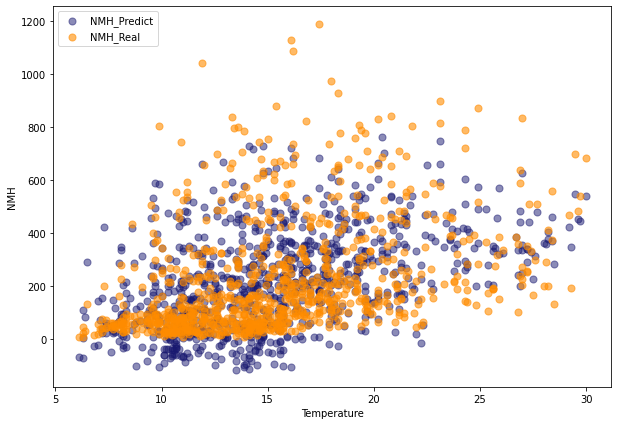

In [22]:
# Temperature Effect on NO2 Prediction

plt.figure(figsize=(10,7))
_=plt.scatter(NMH['Temperature'],NMH_predict, color='midnightblue', alpha=0.5, label='NMH_Predict', s=50)
_=plt.scatter(NMH['Temperature'],NMH['Non Metanic Hydrocarbons_Real'], color='darkorange', alpha=0.6, label='NMH_Real', s=50)
plt.xlabel('Temperature')
plt.ylabel('NMH')
plt.legend(loc="upper left")

plt.show()

* The linear model is not successful in predicting low levels of NMH and shows negative amounts.(In temperatures below 15C)
* The model can't predict very high levels of non methanic hydrocarbons.

### 5.4. Summary

In both linear models for CO and non-methanic hydrocarbons, the model shows negative amounts in very low amounts of real data and can't predict very high amounts of CO and non-methanic hydrocarbons. 
The decision tree model for NOX is deviating from real data in low levels of temperature and humidity.
The random forest model for NO2 showed more diffence with real data in very low or high levels of tempearture and humidity.